In [43]:
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def weather(str):
  return f"Hi! well.. i have no idea... but...."

def rainy_weather(str):
  return f"{str} Its going to rain today. Carry an umbrella!"

def sunny_weather(str): 
  return f"{str} Its going to be sunny today. Wear your sunglasses!"

In [58]:
import random
from typing import Literal

def forecast_weather(str) -> Literal["rainy", "sunny"]:
  if random.random() < 0.5:
    return "rainy"
  else:
    return "sunny"

In [59]:
from langgraph.graph import Graph, START, END

workflow = Graph()

workflow.add_node("weather", weather)
workflow.add_node("rainy", rainy_weather)
workflow.add_node("sunny", sunny_weather)

workflow.add_edge(START, 'weather')
workflow.add_conditional_edges('weather', forecast_weather)
workflow.add_edge('rainy', END)
workflow.add_edge('sunny', END)


app = workflow.compile()


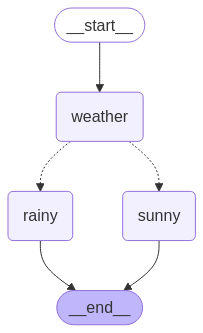

In [60]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [61]:
app.invoke("node_1")

Hi! well.. i have no idea... but....


'Hi! well.. i have no idea... but.... Its going to be sunny today. Wear your sunglasses!'